# Reproducibility with original data

This tutorial demonstrates spatially variable gene detection on ST mouse olfactory bulb data using SODB and Sepal.

A reference paper can be found at https://academic.oup.com/bioinformatics/article/37/17/2644/6168120.

This tutorial refers to the following tutorial at https://github.com/almaan/sepal/blob/master/examples/melanoma.ipynb. At the same time, the way of loadding data is modified by using SODB.

## Import packages and set configurations

In [1]:
# Import several Python packages commonly used in data analysis and visualization.
# numpy (imported as np) is a package for numerical computing with arrays
import numpy as np
# pandas (imported as pd) is a package for data manipulation and analysis
import pandas as pd
# matplotlib.pyplot (imported as plt) is a package for data visualization
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
# Import sepal package and its modules
import sepal
import sepal.datasets as d
import sepal.models as m
import sepal.utils as ut
import sepal.family as family
import sepal.enrich as fea

## Streamline development of loading spatial data with SOBD

In [3]:
# Import pysodb package
# Pysodb is a Python package that provides a set of tools for working with SODB databases. 
# SODB is a format used to store data in memory-mapped files for efficient access and querying. 
# This package allows users to interact with SODB files using Python.
import pysodb

In [4]:
# Initialization
sodb = pysodb.SODB()

In [5]:
# Define names of the dataset_name and experiment_name
dataset_name = 'stahl2016visualization'
experiment_name = 'Rep4_MOB_trans'
# Load a specific experiment
# It takes two arguments: the name of the dataset and the name of the experiment to load.
# Two arguments are available at https://gene.ai.tencent.com/SpatialOmics/.
adata = sodb.load_experiment(dataset_name,experiment_name)

load experiment[Rep4_MOB_trans] in dataset[stahl2016visualization]


In [6]:
# Save the AnnData object to an H5AD file format.
adata.write_h5ad('MOB_pysodb.h5ad')

## Perform Sepal for spatially variable gene detection

In [7]:
# Load in the raw data using a RawData class.
raw_data = d.RawData('MOB_pysodb.h5ad')

In [8]:
# Filter genes observed in less than 5 spots and/or less than 10 total observations
raw_data.cnt = ut.filter_genes(raw_data.cnt,
                               min_expr=10,
                               min_occur=5)

In [9]:
# Derivative of CountData to hold ST1k array based data using a ST1K class
data = m.ST1K(raw_data,
              eps = 0.1)

In [10]:
data.cnt.shape

(264, 10869)

In [11]:
# A propagate class is employ to normalize count data and then propagate it in time, to measure the diffusion time.
# Set scale = True to perform
# Minmax scaling of the diffusion times
times = m.propagate(data,
                    normalize = True,
                    scale =True)

[INFO] : Using 128 workers
[INFO] : Saturated Spots : 199


100%|██████████| 10869/10869 [00:29<00:00, 371.61it/s]


In [12]:
# Inspect the top 20 highest ranked ones after computing diffusion times for all the profiles

n_top = 20
# get names of profiles
sorted_indices = np.argsort(times.values.flatten())
# argsort sorts from low to high, so reverse the order
sorted_indices = sorted_indices[::-1]
sorted_profiles = times.index.values[sorted_indices]
# extract top profiles
top_profiles = sorted_profiles[0:n_top]
# extract tail profiles
tail_profiles = sorted_profiles[-n_top:]
# display top profiles and their times
times.loc[top_profiles,:]

,average
Rbfox1,1.000000
Gpsm1,0.832367
Prkca,0.806763
Penk,0.796135
Tyro3,0.786957
Rbfox3,0.763285
Pcp4,0.733333
Cacng3,0.733333
Omp,0.732850
Kcnh3,0.723188


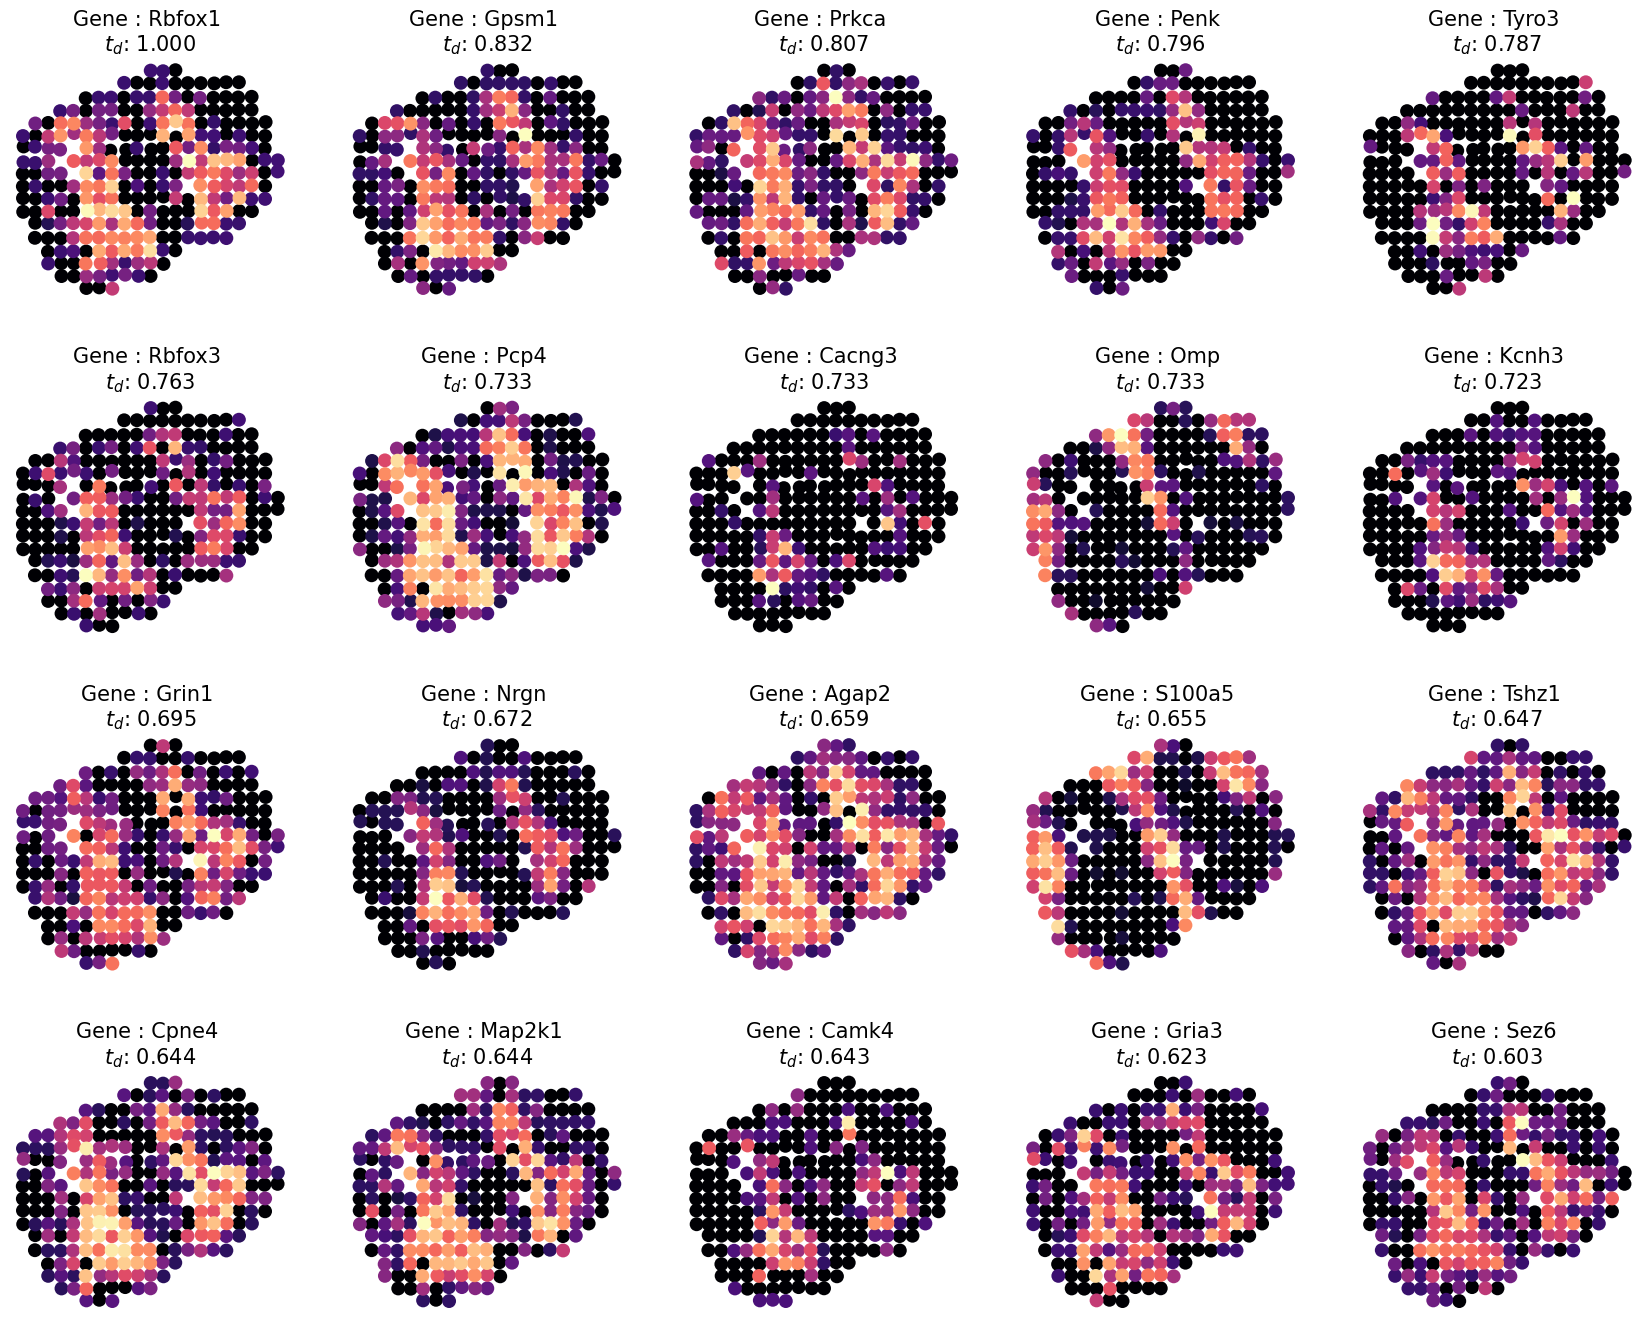

In [13]:
# Inspect detecition visually by using the "plot_profiles function for first 20 SVG
# Reset s to 100 for better visual display

pltargs = dict(s = 100,
                cmap = "magma",
                edgecolor = 'none',
                marker = 'o',
                )

# plot the profiles
fig,ax = ut.plot_profiles(cnt = data.cnt.loc[:,top_profiles],
                          crd = data.real_crd,
                          rank_values = times.loc[top_profiles,:].values.flatten(),
                          pltargs = pltargs,
                         )
# plt.show()
plt.savefig('figures/ST_head.pdf',bbox_inches='tight',transparent=True)

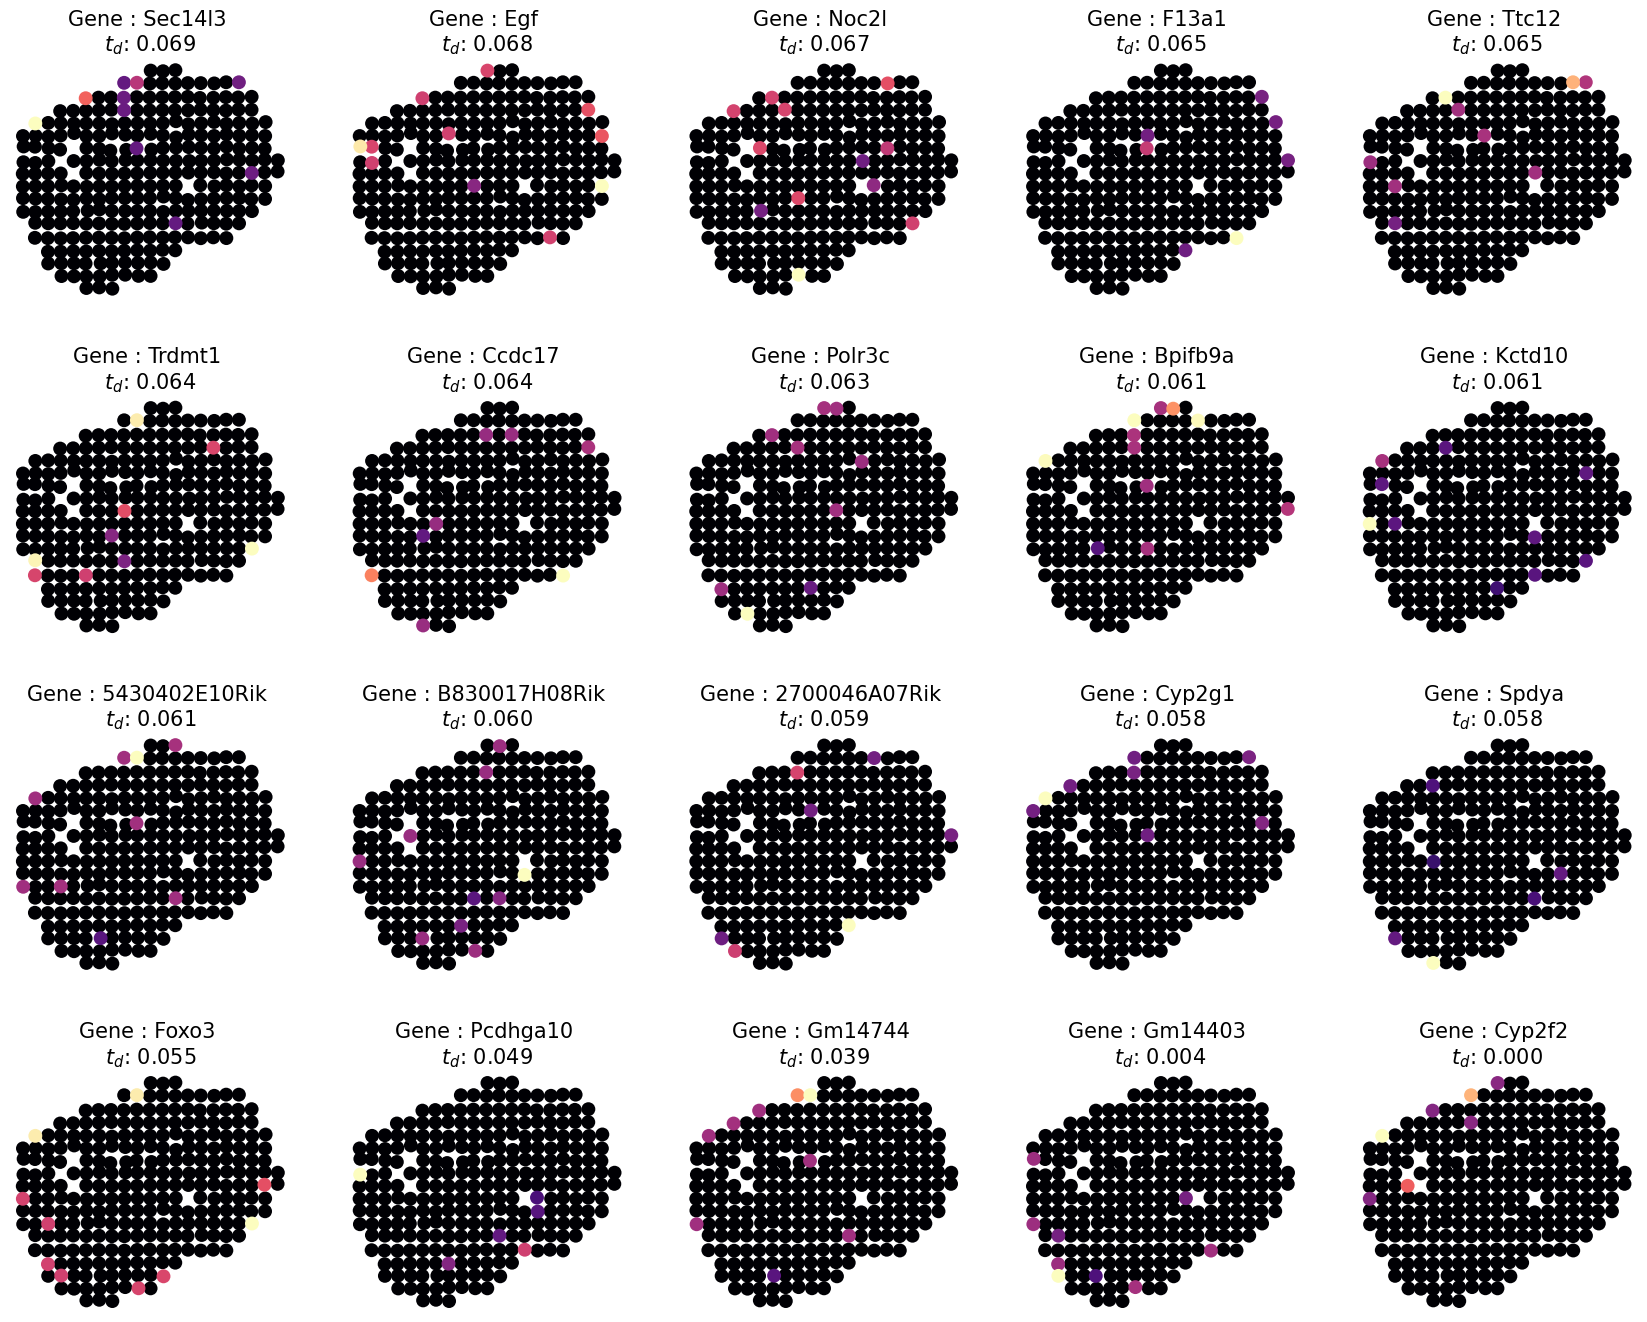

In [14]:
# Inspect detecition visually by using the "plot_profiles function for last 20 SVG
# Reset s to 100 for better visual display

pltargs = dict(s = 100,
                cmap = "magma",
                edgecolor = 'none',
                marker = 'o',
                )

# plot the profiles
fig,ax = ut.plot_profiles(cnt = data.cnt.loc[:,tail_profiles],
                          crd = data.real_crd,
                          rank_values = times.loc[tail_profiles,:].values.flatten(),
                          pltargs = pltargs,
                         )
# plt.show()
plt.savefig('figures/ST_tail.pdf',bbox_inches='tight',transparent=True)